<a href="https://colab.research.google.com/github/pedrorotta/procesamiento_de_imagenes/blob/main/M%C3%A9todos_de_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Métodos de preprocesamiento.**

En este capítulo exploraremos los siguientes objetivos:


## Objetivos:

*   Histograma de una imágen
*   Funciones puntuales 
    *    Negación digital
    *    Ajuste de contraste
    *    Ecualización del histograma
    *    Correción gamma
*   Funciones geométricas
    *    Traslación
    *    Rotación

## **Histograma de una imagen**





### Funciones de configuración

In [ ]:
#Conectar google drive: google.colab import drive /content/drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Indicar la ruta raíz(root) : Lugar de almacenamiento de la carpeta principal

In [ ]:
import os
root = '/content/drive/MyDrive/Curso procesamiento'

In [ ]:
#Funciones que permiten aplicar el root como ruta principal. 

In [ ]:
# El comando chdir selecciona un nuevo directorio principal
os.chdir(root)
#Con el comando listdir podemos observar las carpetas o archivos de dicho directorio
os.listdir()

['Code+-+Modern+Computer+Vision_05_06_2022', 'images']

In [ ]:
#os.listdir() lo podemos convertir en variable
list_dir = os.listdir()

In [ ]:
#definimos la ruta de la imágen
ruta_imagen = 'images/img1.jpg'

### Funciones y métodos para abrir una imágen

In [ ]:
#importamos las librerías numpy, cv2 y pyplot de matplotlib

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#### Funciones propias

In [ ]:
def showrgb(image = None, title = 'Image', size = 5 ):
  #Creada para poder visualizar la imágen rgb. 
  w,h = image.shape[1],image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

#### Funciones de análisis 

In [ ]:
#abrir la imagen
person = cv2.imread(ruta_imagen)

### Función para histograma

In [ ]:
person_gray = cv2.cvtColor(person,cv2.COLOR_BGR2GRAY)
#Aplanado de la matriz intensidad. 
person_grayf = person_gray.flatten()

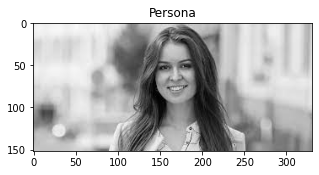

In [ ]:
showrgb(person_gray,'Persona')

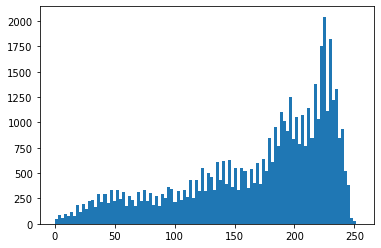

In [ ]:
#histograma : El resultado es una gráfica
#bins: número de rangos
plt.hist(person_grayf, bins = 100)
plt.show()

## **Funciones puntuales**

### Negación digital

In [ ]:
# Negación digital

#### Ejemplo 1

In [ ]:
## Determino el complemento
person_negative = 255-person_gray

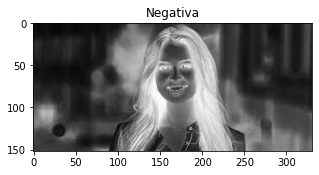

In [ ]:
#Muestro la imagen
showrgb('Negativa',person_negative)

#### Ejemplo 2

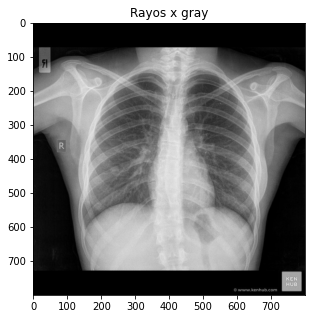

In [ ]:
rg_normal = cv2.imread('images/esq.jpg')
rg_gray = cv2.cvtColor(rg_normal,cv2.COLOR_RGB2GRAY)
showrgb('Rayos x gray', rg_gray)

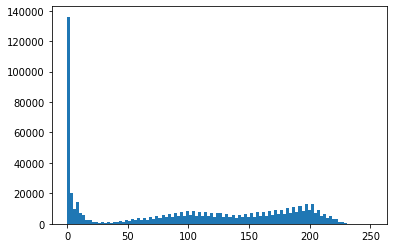

In [ ]:
rg_grayf = rg_gray.flatten()
plt.hist(rg_grayf, bins = 100)
plt.show()

In [ ]:
rg_negative = 255-rg_gray

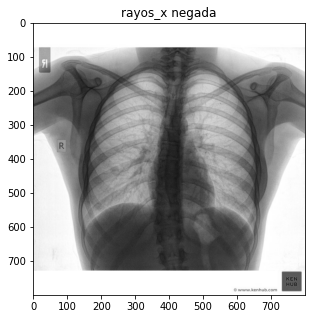

In [ ]:
showrgb('rayos_x negada', rg_negative)

### Ajuste de contraste

In [ ]:
#abrimos la imagen
bo = cv2.imread('images/bo.jpg')


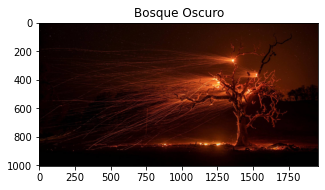

In [ ]:
#mostramos
showrgb('Bosque Oscuro',bo)

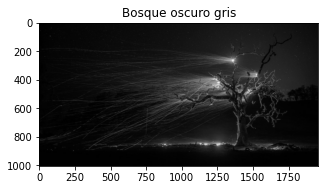

In [ ]:
bo_gray = cv2.cvtColor(bo, cv2.COLOR_BGR2GRAY)
showrgb(bo_gray,'Bosque oscuro gris')

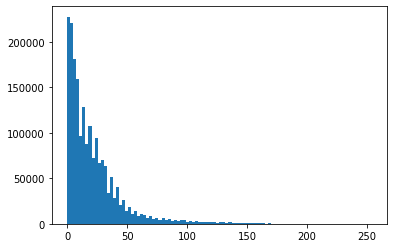

In [ ]:
bo_grayf = bo_gray.flatten()
plt.hist(bo_grayf, bins = 100)
plt.show()

In [ ]:
def stretch_contrast(image, L,M):
  span = M-L
  K = 255/span
  img_stretch = image[:]
  for i in range(0,np.shape(image)[0]):
    for k in range(0,np.shape(image)[1]):
      pixel_dis = img_stretch[i,k]-L
      if pixel_dis<0:
        img_stretch[i,k] = 0
      else:
        img_stretch[i,k] = pixel_dis
  img_stretch = np.uint8(img_stretch*K)
  return img_stretch

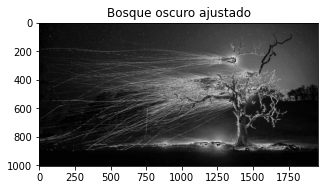

In [ ]:
bo_stretch = stretch_contrast(bo_gray,0,100)
showrgb(bo_stretch, 'Bosque oscuro ajustado')

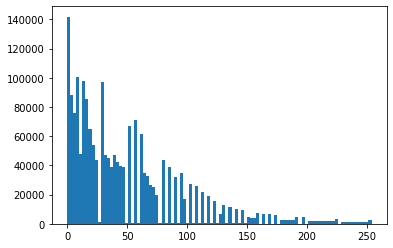

In [ ]:
bo_strechf = bo_stretch.flatten()
plt.hist(bo_strechf,bins = 100)
plt.show()

In [ ]:
ri = cv2.imread('images/ri.png')

In [ ]:
ri_f = ri.flatten()

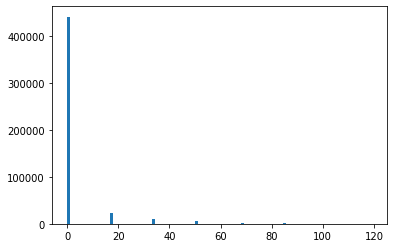

In [ ]:
plt.hist(ri_f,bins = 100)
plt.show()

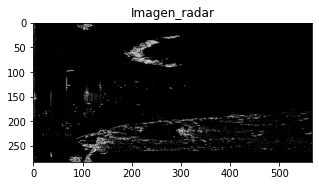

In [ ]:
ri_gray = cv2.cvtColor(ri,cv2.COLOR_BGR2GRAY)
ri_stretch =stretch_contrast(ri_gray,10,60)
showrgb(ri_stretch,'Imagen_radar')

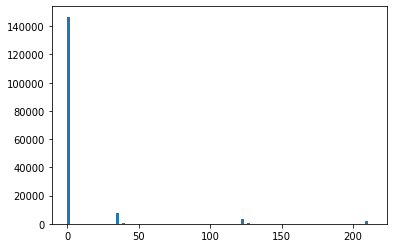

In [ ]:
plt.hist(ri_stretch.flatten(), bins = 100)
plt.show()

### Ecualización del histograma

In [ ]:
bo_equalizate = cv2.equalizeHist(bo_gray)

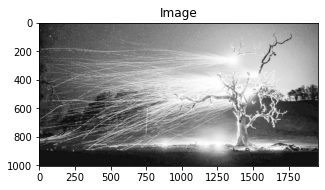

In [ ]:
showrgb(bo_equalizate)

In [ ]:
#demostración
hist,bins = np.histogram(bo_gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_norm = cdf*(hist.max()/cdf.max())
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
np.shape(cdf)

(256,)

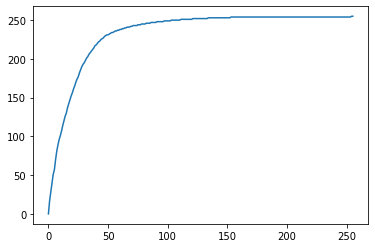

In [ ]:
plt.plot(range(0,256),cdf)

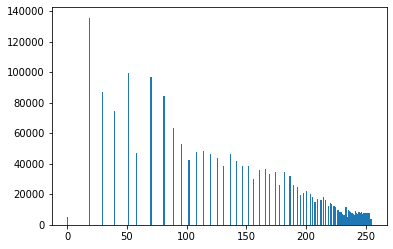

In [ ]:
plt.hist(bo_equalizate.flatten(),bins = 256)
plt.show()

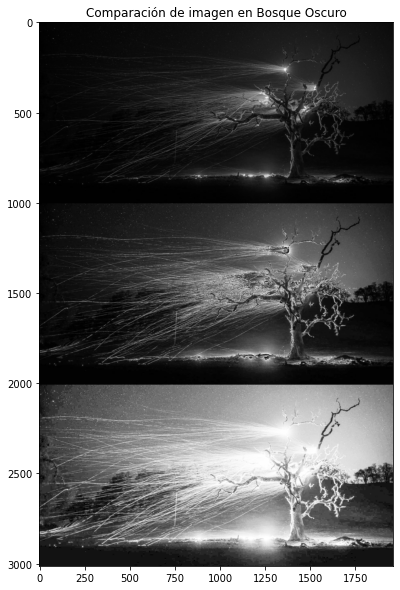

In [ ]:
bo_normal_stretch_equalizate = np.vstack((bo_gray, bo_stretch, bo_equalizate))
showrgb(bo_normal_stretch_equalizate,'Comparación de imagen en Bosque Oscuro',10)

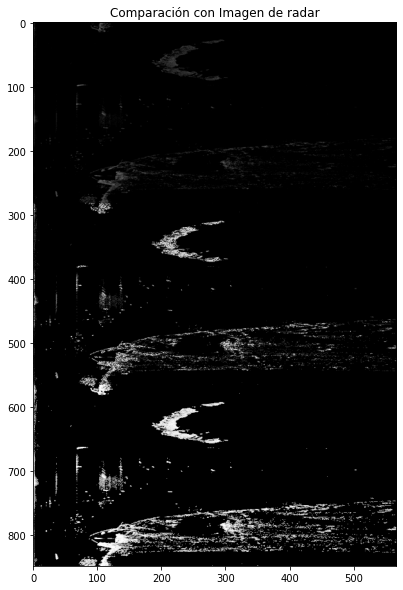

In [ ]:
ri_equa = cv2.equalizeHist(ri_gray)
vsri = np.vstack((ri_gray,ri_stretch,ri_equa))
showrgb(vsri,'Comparación con Imagen de radar',10)

### Correción gamma

In [ ]:
def gamma_f(img,gamma):
  img_n = img/img.max()
  img_ng = img_n ** gamma
  img_g = np.uint8(img_ng*255/img_ng.max())
  return img_g

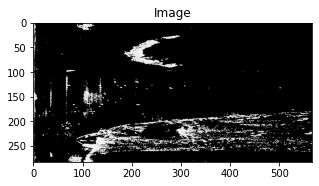

In [ ]:
ri_gamma = gamma_f(ri_gray,1/16)
showrgb(ri_gamma) 

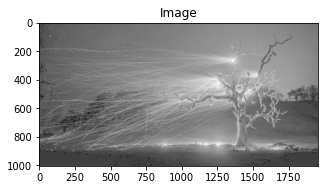

In [ ]:
bo_gamma = gamma_f(bo_gray,1/4)
showrgb(bo_gamma)

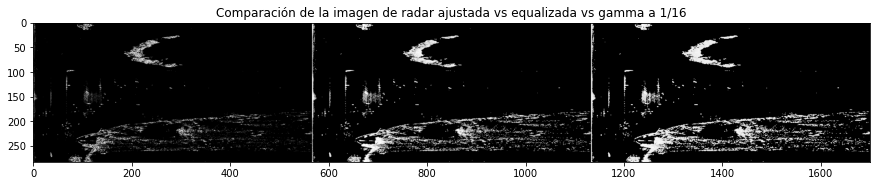

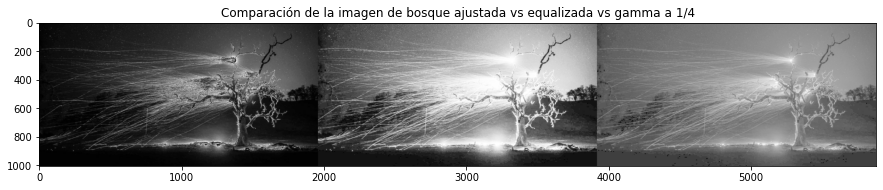

In [ ]:
rivs = np.hstack((ri_stretch,ri_equa,ri_gamma))
bovs = np.hstack((bo_stretch,bo_equalizate,bo_gamma))
showrgb(rivs,'Comparación de la imagen de radar ajustada vs equalizada vs gamma a 1/16', 15)
showrgb(bovs,'Comparación de la imagen de bosque ajustada vs equalizada vs gamma a 1/4', 15)

## **Funciones geométricas**

### Traslación

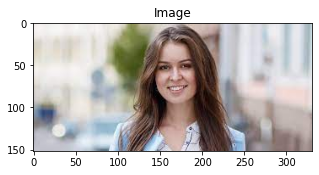

In [ ]:
person = cv2.imread('images/img1.jpg')
showrgb(person)

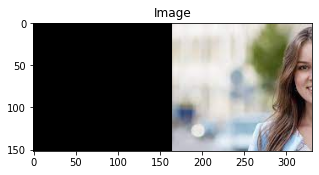

In [ ]:
person = cv2.imread('images/img1.jpg')
T = np.float32([[1,0, half],
              [0,1,0]])
person_traslate2 = cv2.warpAffine(person,T,(np.shape(person)[1],np.shape(person)[0]))

showrgb(person_traslate2)

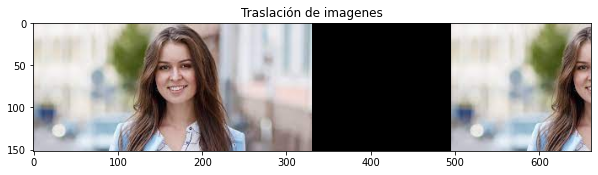

In [ ]:
personvs = np.hstack((person,person_traslate2))
showrgb(personvs,'Traslación de imagenes',10)

### Rotación

In [ ]:
h,w = np.shape(bo_equalizate)[0:2]

rotation_matrix = cv2.getRotationMatrix2D((int(w/2),int(h/2)), -180, 1)

In [ ]:
rotation_matrix

array([[-1.0000000e+00, -1.2246468e-16,  1.9600000e+03],
       [ 1.2246468e-16, -1.0000000e+00,  1.0040000e+03]])

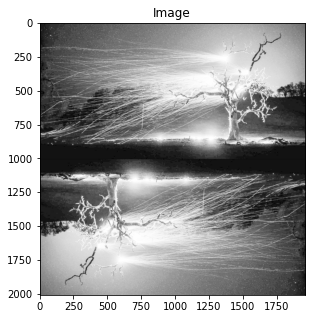

In [ ]:
boe_180 = cv2.warpAffine(bo_equalizate,rotation_matrix,(w,h))
mirror_bo = np.vstack((bo_equalizate,boe_180))
showrgb(mirror_bo)

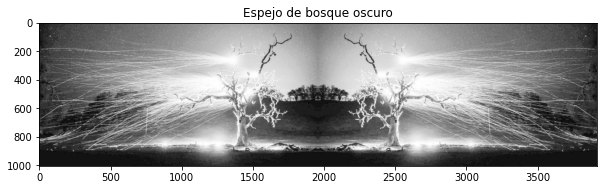

In [ ]:
#transpose and flip
bo_t = cv2.transpose(bo_equalizate)
bo_f = cv2.flip(bo_equalizate,1)
bo_mirror = np.hstack((bo_equalizate,bo_f))
showrgb(bo_mirror, 'Espejo de bosque oscuro',10)